<a href="https://colab.research.google.com/github/nyary-ben/Homework-7B/blob/main/Homework7B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install whit-phys-util 1>/dev/null

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
import numpy as np
from numpy import pi, exp, sqrt
from scipy.integrate import quad
from scipy.optimize import root_scalar
from scipy.optimize import minimize_scalar

In [20]:
repo = buc.local_repository("https://github.com/nyary-ben/Homework-7B")

Repository exists at this location. Pulling changes from GitHub.


## Problem 7.43


### Part b
We will integrate the spectrum distribution over the energies at $400$ nm and at $700$ nm.
$$u(\epsilon) = \frac{8\pi}{(hc)^3} \frac{\epsilon^3}{e^{\epsilon/kT}-1}$$

where $\epsilon$ = $\frac{hc}{\lambda}$.
We also know that, $$\frac{U}{V} = \int^{\infty}_{0}u(\epsilon)d\epsilon$$ and
$$u(\epsilon)d\epsilon = a\frac{x^3}{e^x-1}dx$$ where $x$ = $\frac{\epsilon}{kT}$ where $$a = \frac{8\pi}{(hc)^3} \left( kT \right)^4.$$

In [21]:
c = 2.998*10**8 #m/s
h = 6.626*10**-34 #J*s
k = 1.381*10**-23 #J/K
T = 5800 #K
V = 1 #m^3
a = (8*pi*(h*c)**3)/((k*T)**4)
eps400 = h*c/(400*10**-9)
eps700 = h*c/(700*10**-9)
x4 = eps400/(k*T)
x7 = eps700/(k*T)

def U(x):
  return (x**3)/(np.exp(x)-1)

In [22]:
x7

3.5429363315652607

In [23]:
result = minimize_scalar(lambda x: -U(x),bounds=(0,100)) # find the maximum by finding the minimum of -v(x)

In [24]:
Umax = -result.fun

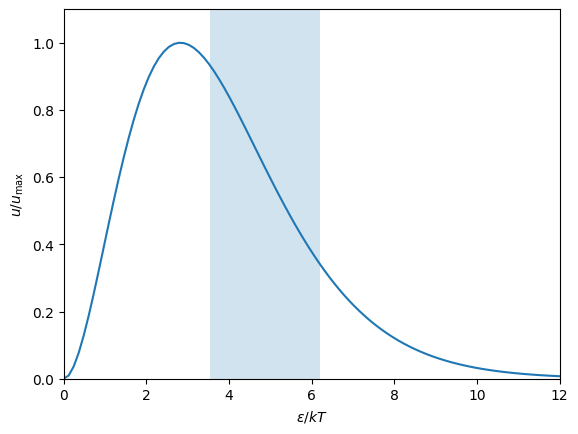

In [25]:
fig1, ax1 = plt.subplots()
x_end = 12
x = np.linspace(1e-9,x_end,100)
ax1.plot(x,U(x)/Umax);
ax1.set_xlim(0,x_end); ax1.set_ylim(0,1.1);
ax1.fill_between([x7,x4],[9,9],alpha=0.2); #visible wavelengths
ax1.set_xlabel(r"$\epsilon/kT$"); ax1.set_ylabel(r"$u/u_\mathrm{max}$");

### Part c
The portion under the curve and inside the shade area can be found using:
$$\frac{U}{V} = \int^{\epsilon_{700nm}}_{\epsilon_{400nm}}u(\epsilon)d\epsilon$$.

In [26]:
areatotal = quad(lambda x: a*U(x),0,np.inf)

<ipython-input-21-671a9f68e225>:13: RuntimeWarning: overflow encountered in exp
  return (x**3)/(np.exp(x)-1)


In [27]:
area = quad(lambda x: a*U(x),x7,x4)
Totalen = 0.857 #J
part = area[0]
total = areatotal[0]
prob = 100*part/total
print(f"The fraction of that partial energy from the visible spectrum is {prob:.2f} % of the total energy")

The fraction of that partial energy from the visible spectrum is 36.77 % of the total energy


## Problem 7.51

### Part d

In [46]:
h1 = 4.136e-15 # in eV*s
k1 = 8.617e-5 # in eV/K
c1 = 3e14 # in µm/s

In [45]:
def w(lam,T):
  return (8*pi*h1*c1)/(exp(h1*c1/(lam*k1*T))-1)/lam**5

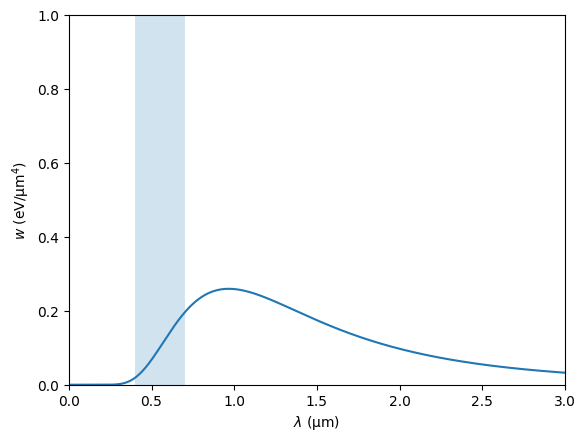

In [48]:
fig2, ax2 = plt.subplots()
lam_end = 3
lam = np.linspace(0.01,lam_end,500)
ax2.plot(lam,w(lam,3000));
ax2.fill_between([0.4,0.7],[9,9],alpha=0.2) #visible wavelengths
ax2.set_xlim(0,lam_end);
ax2.set_ylim(0,1);
ax2.set_xlabel(r"$\lambda$ (µm)");
ax2.set_ylabel(r"$w$ ($\mathrm{eV/µm^4}$)");

### Part e

## Problem 7.53

### Part e

In [28]:
T = 6.14*10**-8 #K
h = 6.626*10**-34 #J*s
c = 2.998*10**8 #m/s
k = 1.381*10**-23 #J/K
UV = 8*pi**5*(k*T)**4/(15*(h*c)**3)
UV1 = UV**-1
UV1

9.290795264180274e+43